In [43]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer , load_iris , load_diabetes , make_regression , load_wine
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression , Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score ,  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


# Esercizio 5.1: Confronta prestazioni tra Decision Tree e Random Forest
# usando il dataset Iris con cross-validation

In [44]:
iris = load_iris()
X, y = iris.data, iris.target

# 2. Inizializza i due modelli
single_tree = DecisionTreeClassifier(random_state=42)

random_forest = RandomForestClassifier(random_state=42)

# 3. Esegui la cross-validation (a 10 fold) per entrambi
cv_folds = 10
scores_tree = cross_val_score(single_tree, X, y, cv=cv_folds)
scores_forest = cross_val_score(random_forest, X, y, cv=cv_folds)


print(f"--- Confronto Performance con Cross-Validation (cv={cv_folds}) ---")

print(f"\n Decision tree:")
print(f"   Accuratezza Media: {np.mean(scores_tree):.4f}")
print(f"   Deviazione Standard: {np.std(scores_tree):.4f}")
print(f"   Accuratezze individuali: {[f'{s:.2f}' for s in scores_tree]}")

print(f"\n Random Forest:")
print(f"   Accuratezza Media: {np.mean(scores_forest):.4f}")
print(f"   Deviazione Standard: {np.std(scores_forest):.4f}")
print(f"   Accuratezze individuali: {[f'{s:.2f}' for s in scores_forest]}")

--- Confronto Performance con Cross-Validation (cv=10) ---

 Decision tree:
   Accuratezza Media: 0.9533
   Deviazione Standard: 0.0427
   Accuratezze individuali: ['1.00', '0.93', '1.00', '0.93', '0.93', '0.87', '0.93', '0.93', '1.00', '1.00']

 Random Forest:
   Accuratezza Media: 0.9600
   Deviazione Standard: 0.0327
   Accuratezze individuali: ['1.00', '0.93', '1.00', '0.93', '0.93', '0.93', '0.93', '0.93', '1.00', '1.00']


Confronta Random Forest, Gradient Boosting e AdaBoost. 
# Esercizio 5.2: Confronta tre metodi ensemble sul dataset Breast Cancer
- Analizza accuracy e tempi di training

In [45]:
# 1. Carica e suddividi il dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    test_size=0.2, 
    random_state=42,
    stratify=cancer.target
)

# 2. Inizializza i modelli
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# 3. Addestra, valuta e cronometra ogni modello
results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    results.append([name, accuracy, train_time])

# 4. Mostra i risultati in una tabella
df_results = pd.DataFrame(results, columns=["Metodo", "Accuratezza", "Tempo di Training (s)"])
display(df_results)

,Metodo,Accuratezza,Tempo di Training (s)
0,Random Forest,0.95614,0.091933
1,Gradient Boosting,0.95614,0.293250
2,AdaBoost,0.95614,0.079674


# Esercizio 5.3: Ottimizza Gradient Boosting con Grid Search
- Focus su learning_rate, n_estimators, max_depth

In [46]:
# 1. Carica e suddividi il dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    test_size=0.2, 
    random_state=42
)

# 2. Inizializza il modello base
gb_classifier = GradientBoostingClassifier(random_state=42)

# 3. Definisci la griglia di iperparametri da testare
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# 4. Configura ed esegui GridSearchCV
# verbose=1 mostra i progressi durante l'esecuzione
grid_search = GridSearchCV(
    estimator=gb_classifier, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
duration = time.time() - start_time

# 5. Stampa i risultati
print(f"\nTempo di esecuzione della Grid Search: {duration:.2f} secondi.")
print("\n--- Risultati Ottimali ---")
print("Migliori iperparametri trovati:")
print(grid_search.best_params_)
print(f"\nMigliore accuratezza (cross-validation): {grid_search.best_score_:.4f}")

# Valuta il modello migliore sul test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Accuratezza sul test set con i parametri migliori: {test_accuracy:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Tempo di esecuzione della Grid Search: 4.42 secondi.

--- Risultati Ottimali ---
Migliori iperparametri trovati:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Migliore accuratezza (cross-validation): 0.9648
Accuratezza sul test set con i parametri migliori: 0.9561


# Esercizio 6.1: Applica regressione lineare al dataset Diabetes
- Analizza coefficienti e R² score

In [47]:
# 1. Carica e prepara il dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Dividi i dati in set di training e test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Valuta il modello
# Calcola il punteggio R² sul test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Punteggio R² sul test set: {r2:.4f}")

# 4. Analizza i coefficienti
# Crea un DataFrame per una visualizzazione chiara
coefficients = pd.DataFrame(
    model.coef_, 
    index=diabetes.feature_names, 
    columns=['Coefficiente']
).sort_values(by='Coefficiente', ascending=False)

print("\nCoefficienti del modello:")
display(coefficients)

Punteggio R² sul test set: 0.4526

Coefficienti del modello:


,Coefficiente
s5,736.198859
bmi,542.428759
s2,518.062277
bp,347.703844
s4,275.317902
s3,163.419983
s6,48.670657
age,37.904021
sex,-241.964362
s1,-931.488846


# Esercizio 6.2: Confronta Ridge, Lasso ed Elastic Net
- Usa un dataset con molte feature per vedere l'effetto della regolarizzazione

--- Effetto della Regolarizzazione sui Coefficienti ---
Coefficienti azzerati da Ridge: 0 / 200
Coefficienti azzerati da Lasso: 132 / 200
Coefficienti azzerati da Elastic Net: 13 / 200


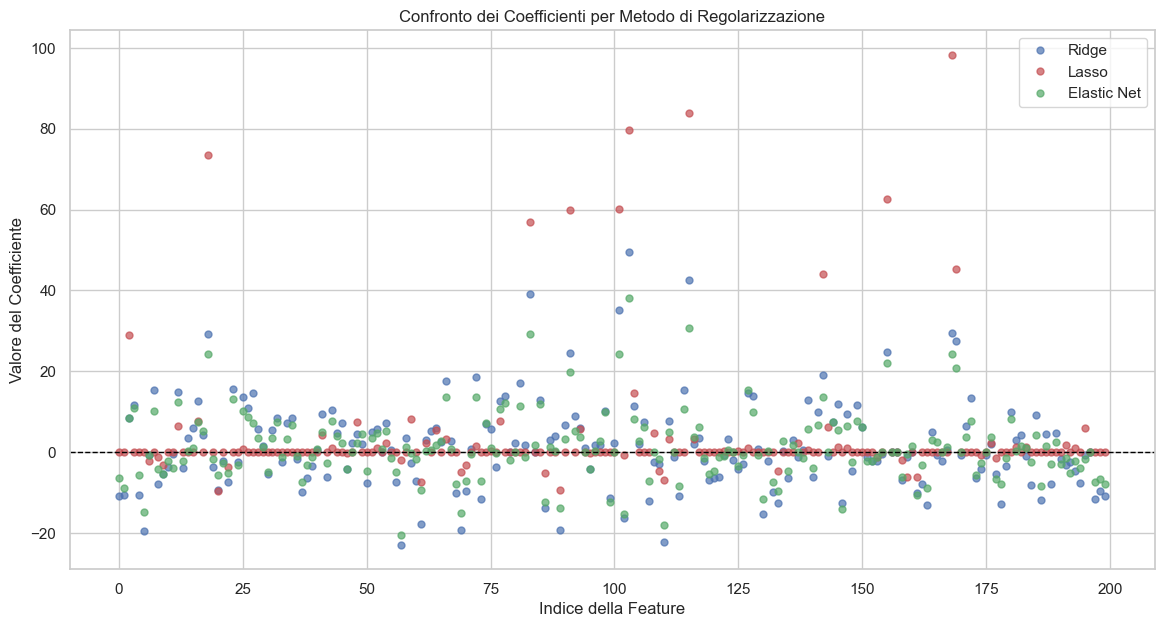

In [48]:
# 1. Crea un dataset con molte feature (200), ma poche informative (15)
X, y = make_regression(
    n_samples=100, 
    n_features=200, 
    n_informative=15, 
    noise=30, 
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Addestra i tre modelli con regolarizzazione di default (alpha=1.0)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
elastic_net = ElasticNet(alpha=1.0).fit(X_train, y_train)

# 3. Analizza i coefficienti
# Stampa quanti coefficienti sono stati azzerati da ciascun modello
print("--- Effetto della Regolarizzazione sui Coefficienti ---")
print(f"Coefficienti azzerati da Ridge: {np.sum(ridge.coef_ == 0)} / 200")
print(f"Coefficienti azzerati da Lasso: {np.sum(lasso.coef_ == 0)} / 200")
print(f"Coefficienti azzerati da Elastic Net: {np.sum(elastic_net.coef_ == 0)} / 200")

# 4. Visualizza i coefficienti
coefficients = pd.DataFrame({
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'Elastic Net': elastic_net.coef_
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))
plt.plot(coefficients['Ridge'], 'bo', label='Ridge', alpha=0.7, markersize=5)
plt.plot(coefficients['Lasso'], 'ro', label='Lasso', alpha=0.7, markersize=5)
plt.plot(coefficients['Elastic Net'], 'go', label='Elastic Net', alpha=0.7, markersize=5)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Confronto dei Coefficienti per Metodo di Regolarizzazione')
plt.xlabel('Indice della Feature')
plt.ylabel('Valore del Coefficiente')
plt.legend()
plt.show()

# Esercizio 6.3: Usa Regressione Logistica per classificazione multiclasse
- Analizza probabilità di predizione e matrice di confusione

Accuratezza complessiva del modello: 0.9815

--- Analisi delle Probabilità (primi 5 campioni del test set) ---
Campione 1 (Reale: classe 0)
  Probabilità [classe 0, 1, 2]: [0.99  0.009 0.   ]
  Predizione: classe 0 (con probabilità 99.0%)
------------------------------
Campione 2 (Reale: classe 1)
  Probabilità [classe 0, 1, 2]: [0.002 0.997 0.001]
  Predizione: classe 1 (con probabilità 99.7%)
------------------------------
Campione 3 (Reale: classe 0)
  Probabilità [classe 0, 1, 2]: [1. 0. 0.]
  Predizione: classe 0 (con probabilità 100.0%)
------------------------------
Campione 4 (Reale: classe 0)
  Probabilità [classe 0, 1, 2]: [0.999 0.    0.001]
  Predizione: classe 0 (con probabilità 99.9%)
------------------------------
Campione 5 (Reale: classe 0)
  Probabilità [classe 0, 1, 2]: [0.753 0.245 0.002]
  Predizione: classe 0 (con probabilità 75.3%)
------------------------------


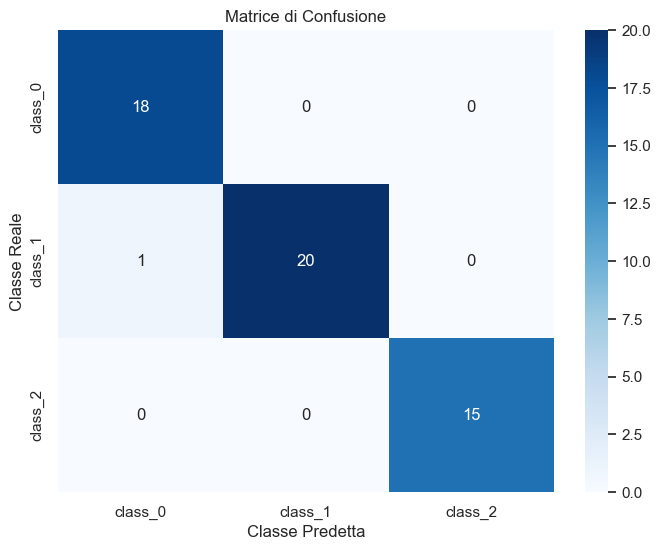

In [ ]:
wine = load_wine()
X, y = wine.data, wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print(f"Accuratezza complessiva del modello: {accuracy_score(y_test, y_pred):.4f}\n")

print("--- Analisi delle Probabilità (primi 5 campioni del test set) ---")
for i in range(5):
    prob_per_class = np.round(y_proba[i], 3)
    predicted_class = y_pred[i]
    true_class = y_test[i]
    
    print(f"Campione {i+1} (Reale: classe {true_class})")
    print(f"  Probabilità [classe 0, 1, 2]: {prob_per_class}")
    print(f"  Predizione: classe {predicted_class} (con probabilità {prob_per_class.max() * 100:.1f}%)")
    print("-" * 30)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Matrice di Confusione')
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Reale')
plt.show()
